<a href="https://colab.research.google.com/github/HUMBERTO21DC/Tarea-3/blob/main/tarea_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2-


$dT/dt=k(T-Tm)$

Planteo la ecuacion diferencial

In [1]:
from sympy import *
import sympy
from sympy import symbols, Eq, diff

t = symbols('t')
T = Function ('T')
k = symbols('k')
Tm = 70

ED = Eq(diff(T(t), t, 1), k*(T(t) - Tm))

ED

Eq(Derivative(T(t), t), k*(T(t) - 70))

Resuelvo la ecuacion diferencial

In [2]:
dsolve(ED)

Eq(T(t), C1*exp(k*t) + 70)

Busco la ecuacion particular de la condicion T(0)=300

$dT/dt=k(T-Tm) ;\quad T(0)=300$

In [3]:
dsolve(ED,ics={T(0):300})

Eq(T(t), 230*exp(k*t) + 70)

Sustitulo la constante obtenida y con la otra condicion de T(3)=200 busco k

In [4]:
import math
import sympy
k = sympy.Symbol('k')
t = symbols('t')
T = Function('T')

ED1=sympy.Eq(T(t),230*sympy.exp (k*t)+70)

ED1

Eq(T(t), 230*exp(k*t) + 70)

In [5]:
solve(ED1,k)

[log(T(t)/230 - 7/23)/t]

In [6]:
K=(math.log(200/230-7/23))/3
K

-0.19018161948920434

Planteo la ecuacion particular y grafico para ver donde alcanza 70°F

In [7]:
ED2=sympy.Eq(T(t),230*sympy.exp (K*t)+70)
ED2

Eq(T(t), 70 + 230*exp(-0.190181619489204*t))

<function matplotlib.pyplot.show(close=None, block=None)>

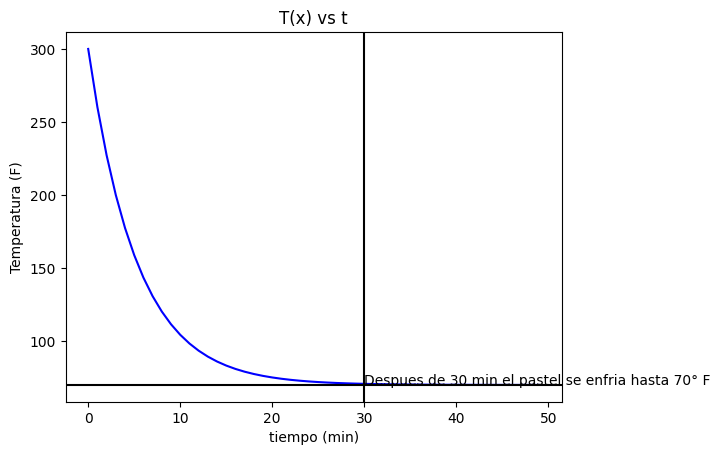

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp

x_valores = np.arange(0,50)
y_valores = 230*np.exp (-0.19018161948920434*(x_valores))+70

plt.plot(x_valores, y_valores, color='blue', label='T(t) vs t')
plt.xlabel('tiempo (min)')
plt.ylabel('Temperatura (F)')
plt.title ('T(x) vs t')
plt.axhline (70, color='black')
plt.axvline (30, color='black')
plt.annotate ('Despues de 30 min el pastel se enfria hasta 70° F', xy=(30,70))
plt.show




3-



$dx/dt=x(1-0.1x-0.05y)$

$dy/dt=y(1.7-0.1y-0.15x)$


a) $x(0)=1.1, y(0)=1$

b) $x(0)=4, y(0)=10$

In [10]:
import scipy.integrate as spi
import numpy as np

In [20]:
def modelo_competencia(poblaciones, tiempo):

    x = poblaciones[0]
    y = poblaciones[1]
    # Defino los parámetros del modelo
    a = 0.1 # Tasa de crecimiento de x
    b = 0.05 # Tasa de competencia de y sobre x
    c = 0.1 # Tasa de crecimiento de y
    d = 0.15 # Tasa de competencia de x sobre y
    # Calculo las derivadas de x e y
    dxdt = x * (1 - a * x - b * y)
    dydt = y * (1 - c * y - d * x)

    return [dxdt, dydt]

Defino las condiciones iniciales y los valores de tiempo para el caso a

In [21]:

poblaciones_iniciales_a = [1.1, 1]
tiempo_a = np.linspace(0, 50, 100)

Resuelvo y extraigo las soluciones de x e y para el caso a

In [22]:
solucion_a = spi.odeint(modelo_competencia, poblaciones_iniciales_a, tiempo_a)

x_a = solucion_a[:, 0]
y_a = solucion_a[:, 1]

Defino las condiciones iniciales y los valores de tiempo para el caso b

In [24]:

poblaciones_iniciales_b = [4, 10]
tiempo_b = np.linspace(0, 50, 100)



Resuelvo y extraigo las soluciones de x e y para el caso b

In [23]:
solucion_b = spi.odeint(modelo_competencia, poblaciones_iniciales_b, tiempo_b)

x_b = solucion_b[:, 0]
y_b = solucion_b[:, 1]

Grafico las soluciones de los dos casos

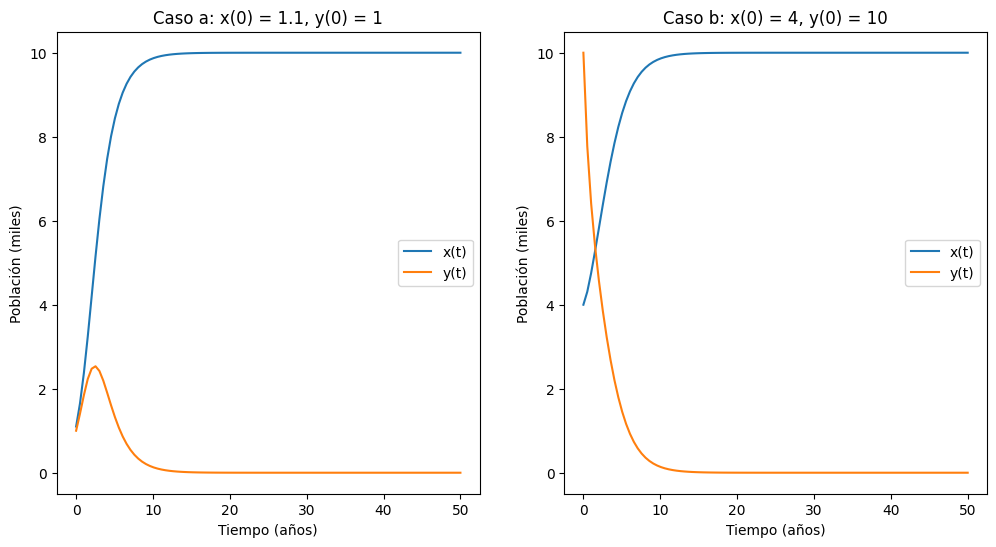

In [30]:
import matplotlib.pyplot as plt


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(tiempo_a, x_a, label="x(t)")
ax1.plot(tiempo_a, y_a, label="y(t)")
ax1.set_title("Caso a: x(0) = 1.1, y(0) = 1")
ax1.set_xlabel("Tiempo (años)")
ax1.set_ylabel("Población (miles)")
ax1.legend()

ax2.plot(tiempo_b, x_b, label="x(t)")
ax2.plot(tiempo_b, y_b, label="y(t)")
ax2.set_title("Caso b: x(0) = 4, y(0) = 10")
ax2.set_xlabel("Tiempo (años)")
ax2.set_ylabel("Población (miles)")
ax2.legend()

plt.show()
